# Import

In [1]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn as sns

import matplotlib.pyplot as plt

# Exploration

In [2]:
url = "https://raw.githubusercontent.com/louiskuhn/IA-P3-Euskadi/main/Projets/Projet%20P5%20-%20IMDB/5000_movies_bis.csv"

df = pd.read_csv(url)

# un premier aperçu
df.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

In [4]:
df.shape

(5043, 28)

In [5]:
df.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [6]:
num_unique = df.nunique()
print("Nombre de différences :", num_unique)

Nombre de différences : color                        2
director_name             2398
num_critic_for_reviews     528
duration                   191
director_fb_likes          435
actor_3_fb_likes           906
actor_2_name              3032
actor_1_fb_likes           878
gross                     4224
genres                     914
actor_1_name              2097
movie_title               4917
num_voted_users           4826
cast_total_fb_likes       3978
actor_3_name              3521
facenumber_in_poster        19
plot_keywords             4760
movie_imdb_link           4919
num_user_for_reviews       954
language                    47
country                     65
content_rating              18
budget                     444
title_year                  91
actor_2_fb_likes           917
imdb_score                  78
aspect_ratio                22
movie_fb_likes             876
dtype: int64


In [7]:
#Drop des colonnes ayant quasi que des valeurs uniques, elles ne contribueront pas à la prédiction.
df.drop(columns=['movie_title','movie_imdb_link','plot_keywords'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4366 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  num_voted_users         5043 non-null   int64  
 12  cast_total_fb_likes     5043 non-null   int64  
 13  actor_3_name            5020 non-null   object 
 14  facenumber_in_poster    5030 non-null   

In [9]:
df.isnull().sum()

color                      19
director_name             104
num_critic_for_reviews     50
duration                   15
director_fb_likes         104
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     677
genres                      0
actor_1_name                7
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
num_user_for_reviews       21
language                   12
country                     5
content_rating            303
budget                    406
title_year                108
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              329
movie_fb_likes              0
dtype: int64

In [10]:
df.dropna(subset=['color','director_name','actor_2_name','actor_1_name','actor_3_name','language','country','content_rating'], inplace=True)

In [11]:
df.isnull().sum()

color                       0
director_name               0
num_critic_for_reviews     19
duration                    1
director_fb_likes           0
actor_3_fb_likes            0
actor_2_name                0
actor_1_fb_likes            0
gross                     380
genres                      0
actor_1_name                0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name                0
facenumber_in_poster       11
num_user_for_reviews        3
language                    0
country                     0
content_rating              0
budget                    248
title_year                  0
actor_2_fb_likes            0
imdb_score                  0
aspect_ratio              182
movie_fb_likes              0
dtype: int64

In [12]:
df.dropna(subset=['aspect_ratio','num_user_for_reviews','facenumber_in_poster','num_critic_for_reviews'], inplace=True)

In [13]:
df.isnull().sum()

color                       0
director_name               0
num_critic_for_reviews      0
duration                    1
director_fb_likes           0
actor_3_fb_likes            0
actor_2_name                0
actor_1_fb_likes            0
gross                     288
genres                      0
actor_1_name                0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name                0
facenumber_in_poster        0
num_user_for_reviews        0
language                    0
country                     0
content_rating              0
budget                    203
title_year                  0
actor_2_fb_likes            0
imdb_score                  0
aspect_ratio                0
movie_fb_likes              0
dtype: int64

### on peut remplacer les NA des 3 dernières variables par leur médianes

In [14]:
median_values = df.median()

df_filled = df.fillna(median_values)

C:\Users\lacom\AppData\Local\Temp\ipykernel_1380\3923436778.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df.median()


In [15]:
df_filled.isnull().sum()

color                     0
director_name             0
num_critic_for_reviews    0
duration                  0
director_fb_likes         0
actor_3_fb_likes          0
actor_2_name              0
actor_1_fb_likes          0
gross                     0
genres                    0
actor_1_name              0
num_voted_users           0
cast_total_fb_likes       0
actor_3_name              0
facenumber_in_poster      0
num_user_for_reviews      0
language                  0
country                   0
content_rating            0
budget                    0
title_year                0
actor_2_fb_likes          0
imdb_score                0
aspect_ratio              0
movie_fb_likes            0
dtype: int64

In [16]:
df_filled.shape

(4450, 25)

In [17]:
#Label encoding des colonnes non numériques
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
df_filled[cat_list]=df_filled[cat_list].apply(lambda x:le.fit_transform(x))

df_filled.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,1,763,723.0,178.0,0.0,855.0,1206,1000.0,760505847.0,97,...,3054.0,10,53,7,237000000.0,80,936.0,7.9,8,33000
1,1,657,302.0,169.0,563.0,1000.0,1903,40000.0,309404152.0,91,...,1238.0,10,53,7,300000000.0,78,5000.0,7.1,13,0
2,1,1704,602.0,148.0,0.0,161.0,2141,11000.0,200074175.0,116,...,994.0,10,52,7,245000000.0,86,393.0,6.8,13,85000
3,1,309,813.0,164.0,22000.0,23000.0,457,27000.0,448130642.0,263,...,2701.0,10,53,7,250000000.0,83,23000.0,8.5,13,164000
5,1,80,462.0,132.0,475.0,530.0,2190,640.0,73058679.0,114,...,738.0,10,53,7,263700000.0,83,632.0,6.6,13,24000


<Axes: >

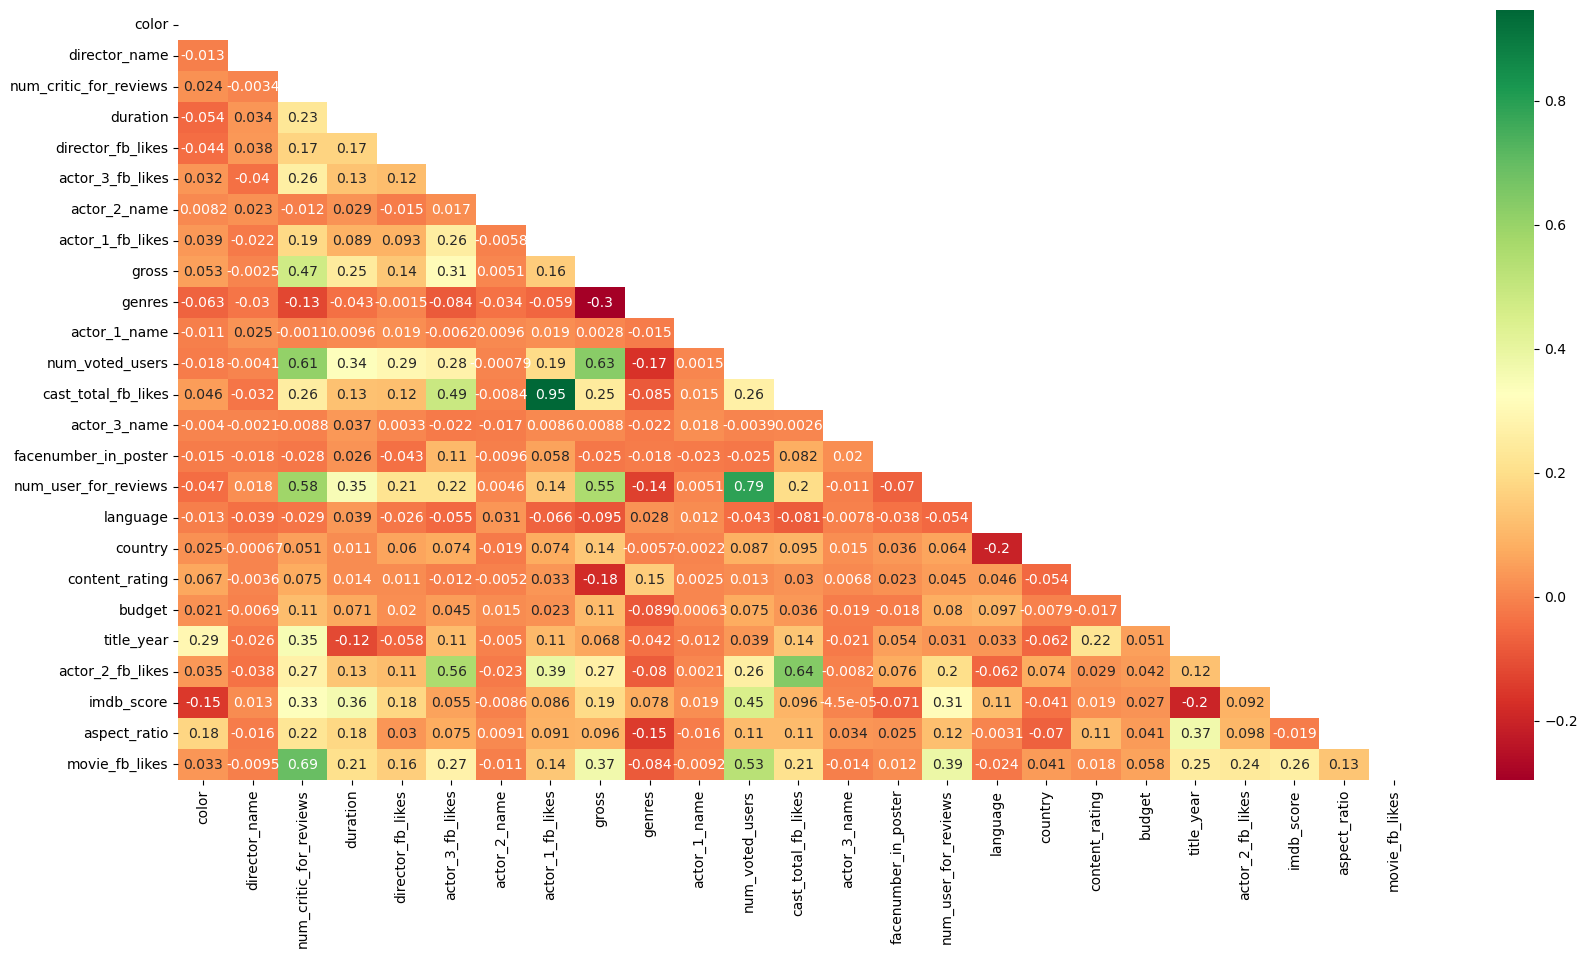

In [18]:
#Finding Correlation between variables
corr = df_filled.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [19]:
# On retire les variables multicollinéaires: cast_total_facebook_likes qui est une variables rassemblant les likes des acteur 1,2et 3 
# et num_critic_for_reviews qui est redondant avec num_user_for_reviews
df_filled.drop(columns=['cast_total_fb_likes','num_critic_for_reviews'],inplace=True)

In [20]:
df_filled.shape

(4450, 23)

In [21]:
df_filled.head()

,color,director_name,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,1,763,178.0,0.0,855.0,1206,1000.0,760505847.0,97,223,...,3054.0,10,53,7,237000000.0,80,936.0,7.9,8,33000
1,1,657,169.0,563.0,1000.0,1903,40000.0,309404152.0,91,837,...,1238.0,10,53,7,300000000.0,78,5000.0,7.1,13,0
2,1,1704,148.0,0.0,161.0,2141,11000.0,200074175.0,116,297,...,994.0,10,52,7,245000000.0,86,393.0,6.8,13,85000
3,1,309,164.0,22000.0,23000.0,457,27000.0,448130642.0,263,1643,...,2701.0,10,53,7,250000000.0,83,23000.0,8.5,13,164000
5,1,80,132.0,475.0,530.0,2190,640.0,73058679.0,114,376,...,738.0,10,53,7,263700000.0,83,632.0,6.6,13,24000


In [22]:
df_filled.describe

<bound method NDFrame.describe of       color  director_name  duration  director_fb_likes  actor_3_fb_likes  \
0         1            763     178.0                0.0             855.0   
1         1            657     169.0              563.0            1000.0   
2         1           1704     148.0                0.0             161.0   
3         1            309     164.0            22000.0           23000.0   
5         1             80     132.0              475.0             530.0   
...     ...            ...       ...                ...               ...   
5027      1            752      90.0              397.0               0.0   
5033      1           1742      77.0              291.0               8.0   
5035      1           1644      81.0                0.0               6.0   
5041      1            374     100.0                0.0             489.0   
5042      1            966      90.0               16.0              16.0   

      actor_2_name  actor_1_fb_likes     

## Model

In [23]:
X_part1 = df_filled.iloc[:, 1:20]  
X_part2 = df_filled.iloc[:, 21:24]  
X = pd.concat([X_part1, X_part2], axis=1).values
y = df_filled.iloc[:, 20].values
y


array([7.9, 7.1, 6.8, ..., 6.9, 6.3, 6.6])

In [24]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
print(X_train.shape)
print(y_train.shape)

(3115, 21)
(3115,)


In [25]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
prec_rf=rf.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('The mean squared error using Random Forest model is: ',mean_squared_error(y_test,prec_rf))
print('The mean absolute error using Random Forest model is: ',mean_absolute_error(y_test,prec_rf))

The mean squared error using Random Forest model is:  0.5127183543071161
The mean absolute error using Random Forest model is:  0.5231737827715356


In [29]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.metrics import make_scorer, r2_score

# to create a RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# to create R2 scorer for GridSearchCV
r2_scorer = make_scorer(r2_score)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# We define the parameter distributions to search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# we perform randomized search
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, scoring=r2_scorer, cv=5, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

# to get the best hyperparameters
best_params_random = random_search.best_params_

# we print the best hyperparameters
print("Best Hyperparameters (RandomizedSearchCV):", best_params_random)

Best Hyperparameters (RandomizedSearchCV): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 158}


In [32]:
# to get the best model from RandomizedSearchCV
best_model_random = random_search.best_estimator_

# we evaluate the best model on the test set
r2_test_random = r2_score(y_test, best_model_random.predict(X_test))

# we print the R2 score on the test set
print("R2 Score on Test Set (RandomizedSearchCV):", r2_test_random)

R2 Score on Test Set (RandomizedSearchCV): 0.5509198325330792
